In [4]:
import pandas as pd
import numpy as np
from statsmodels.tsa.stattools import adfuller
import statsmodels.api as sm
import statsmodels.tsa.api as smt
from statsmodels.tsa.stattools import adfuller
import matplotlib.pyplot as plt
from scipy.stats import boxcox
%matplotlib inline

In [37]:
sales_of_company_x = pd.read_csv("monthly-sales-of-company-x-jan-6.csv")['Count']
robberies_in_boston = pd.read_csv("monthly-boston-armed-robberies-j.csv")['Count']
airlines_passengers = pd.read_csv("international-airline-passengers.csv")['Count']
mean_monthly_temp = pd.read_csv("mean-monthly-air-temperature-deg.csv")['Deg']
dowjones_closing = pd.read_csv("weekly-closings-of-the-dowjones-.csv")['Close']
female_births = pd.read_csv("daily-total-female-births-in-cal.csv")['Count']

In [6]:
def test_stationarity(timeseries):
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
    for [key, value] in dftest[4].items():
        dfoutput['Critical Value (%s)' % key] = value
    print(dfoutput)

In [7]:
def tsplot(y, lags=None, figsize=(12, 7), style="bmh"):
    """
        Plot time series, its ACF and PACF, calculate Dickey–Fuller test
        
        y - timeseries
        lags - how many lags to include in ACF, PACF calculation
    """
    test_stationarity(y)
    if not isinstance(y, pd.Series):
        y = pd.Series(y)

    with plt.style.context(style):
        fig = plt.figure(figsize=figsize)
        layout = (2, 2)
        ts_ax = plt.subplot2grid(layout, (0, 0), colspan=2)
        acf_ax = plt.subplot2grid(layout, (1, 0))
        pacf_ax = plt.subplot2grid(layout, (1, 1))

        ts_ax.plot(y)
        p_value = sm.tsa.stattools.adfuller(y)[1]
        ts_ax.set_title(
            "Time Series Analysis Plots\n Dickey-Fuller: p={0:.5f}".format(p_value)
        )
        smt.graphics.plot_acf(y, lags=lags, ax=acf_ax)
        smt.graphics.plot_pacf(y, lags=lags, ax=pacf_ax)
        plt.tight_layout()

sales_of_company_x

In [8]:
test_stationarity(sales_of_company_x)

Results of Dickey-Fuller Test:
Test Statistic                  0.654715
p-value                         0.988889
#Lags Used                     12.000000
Number of Observations Used    64.000000
Critical Value (1%)            -3.536928
Critical Value (5%)            -2.907887
Critical Value (10%)           -2.591493
dtype: float64


Results of Dickey-Fuller Test:
Test Statistic                  0.654715
p-value                         0.988889
#Lags Used                     12.000000
Number of Observations Used    64.000000
Critical Value (1%)            -3.536928
Critical Value (5%)            -2.907887
Critical Value (10%)           -2.591493
dtype: float64


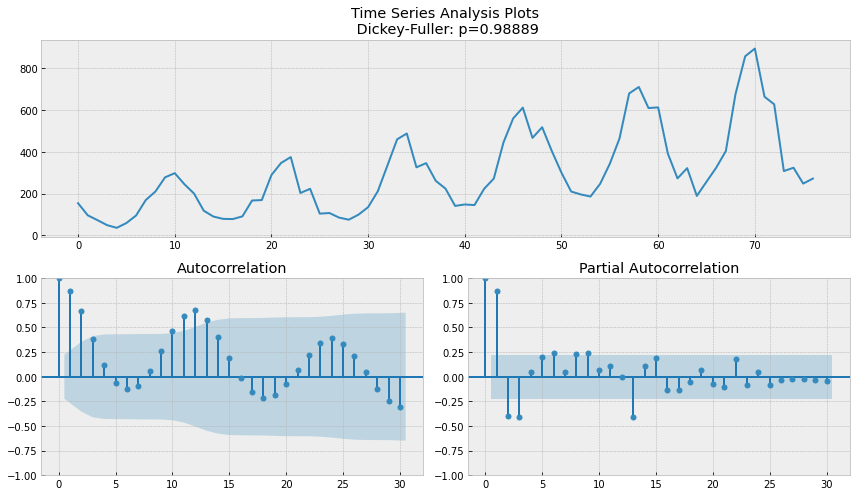

In [9]:
tsplot(sales_of_company_x, lags=30)

In [11]:
sales_of_company_x_bc = boxcox(sales_of_company_x, 0)

Results of Dickey-Fuller Test:
Test Statistic                 -0.908049
p-value                         0.785310
#Lags Used                     12.000000
Number of Observations Used    64.000000
Critical Value (1%)            -3.536928
Critical Value (5%)            -2.907887
Critical Value (10%)           -2.591493
dtype: float64


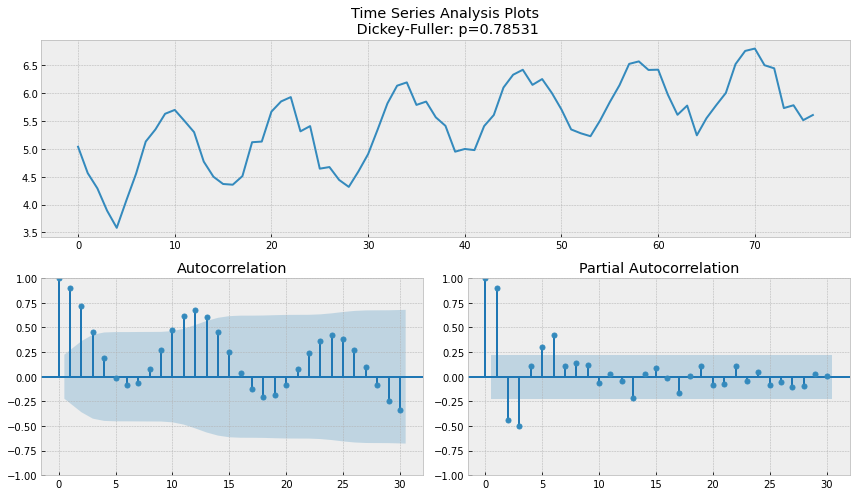

In [12]:
tsplot(sales_of_company_x_bc, lags=30)

In [13]:
sales_of_company_x = np.diff(sales_of_company_x, 1)

Results of Dickey-Fuller Test:
Test Statistic                 -2.587970
p-value                         0.095509
#Lags Used                     12.000000
Number of Observations Used    63.000000
Critical Value (1%)            -3.538695
Critical Value (5%)            -2.908645
Critical Value (10%)           -2.591897
dtype: float64


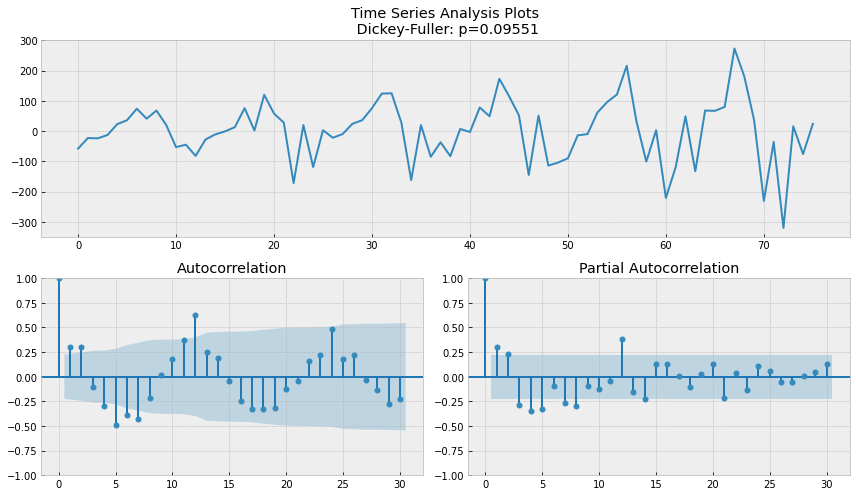

In [14]:
tsplot(sales_of_company_x, lags=30)

Results of Dickey-Fuller Test:
Test Statistic                -9.193734e+00
p-value                        2.089629e-15
#Lags Used                     1.100000e+01
Number of Observations Used    6.300000e+01
Critical Value (1%)           -3.538695e+00
Critical Value (5%)           -2.908645e+00
Critical Value (10%)          -2.591897e+00
dtype: float64


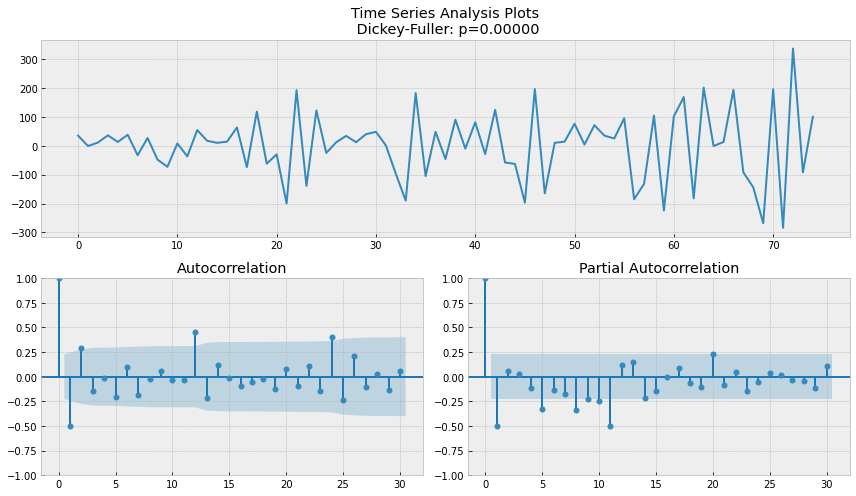

In [15]:
sales_of_company_x = np.diff(sales_of_company_x, 1)
tsplot(sales_of_company_x, lags=30)

Results of Dickey-Fuller Test:
Test Statistic                -7.496913e+00
p-value                        4.355196e-11
#Lags Used                     1.200000e+01
Number of Observations Used    6.100000e+01
Critical Value (1%)           -3.542413e+00
Critical Value (5%)           -2.910236e+00
Critical Value (10%)          -2.592745e+00
dtype: float64


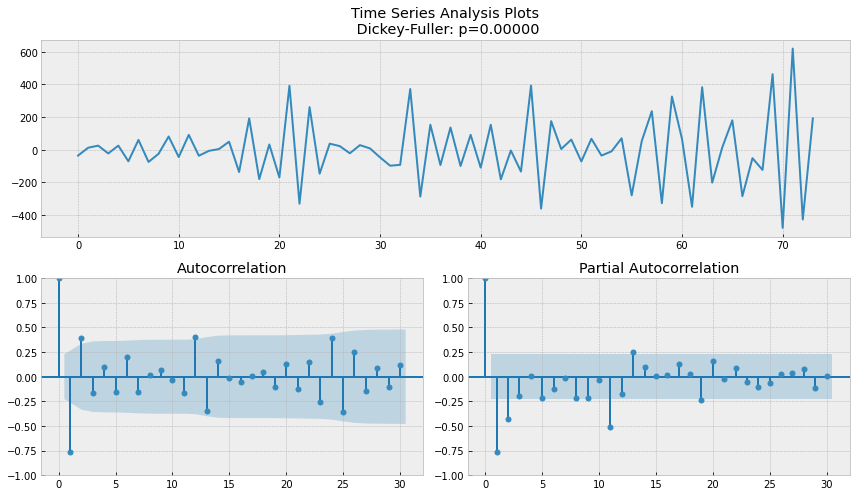

In [16]:
sales_of_company_x = np.diff(sales_of_company_x, 1)
tsplot(sales_of_company_x, lags=30)

robberies_in_boston

Results of Dickey-Fuller Test:
Test Statistic                   1.001102
p-value                          0.994278
#Lags Used                      11.000000
Number of Observations Used    106.000000
Critical Value (1%)             -3.493602
Critical Value (5%)             -2.889217
Critical Value (10%)            -2.581533
dtype: float64


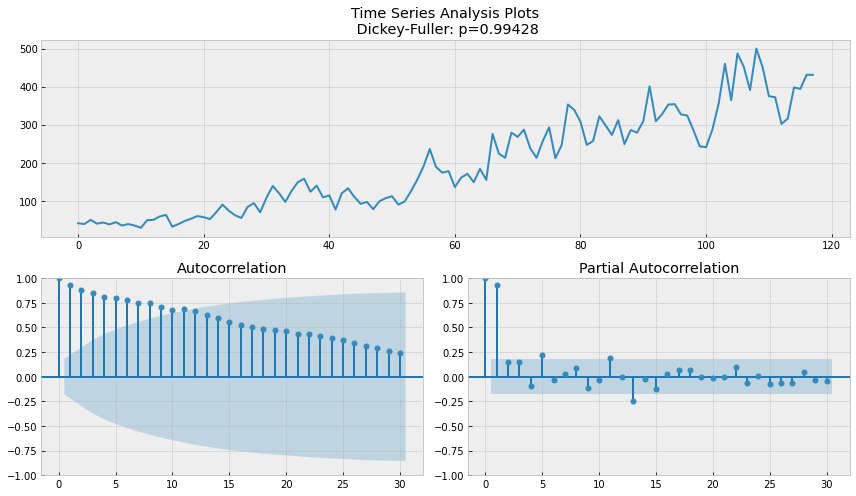

In [25]:
tsplot(robberies_in_boston, lags=30)

In [26]:
robberies_in_boston

0       41
1       39
2       50
3       40
4       43
      ... 
113    316
114    398
115    394
116    431
117    431
Name: Count, Length: 118, dtype: int64

In [28]:
robberies_in_boston = np.diff(robberies_in_boston, 1)

In [29]:
robberies_in_boston

array([  13,  -21,   13,   -8,   11,  -15,   13,   -8,   -2,   26,  -19,
          8,   -5,  -35,   38,    1,   -2,    1,  -10,   -2,   23,    2,
        -36,    4,    5,   36,  -19,  -34,   62,   -7,  -50,   -4,   52,
         -6,  -14,  -43,   50,  -47,   36,  -42,   80,  -30,  -36,    5,
         23,  -24,   40,  -13,   -3,  -27,   30,   19,    3,    5,   11,
        -93,   32,   19,  -46,   67,  -15,  -32,   57,  -64,  150, -173,
         41,   77,  -77,   30,  -68,   24,   69,   -8, -117,  115,   73,
       -121,  -17,  -30,   71,   55,  -89,   -1,   64, -102,  100,  -44,
         37,   62, -184,  111,    6,  -24,  -28,   24,  -36,   -3,   40,
         48,   22,   37, -201,  219, -158,  -26,  170, -158,  -27,   73,
        -67,   84,   68,  -86,   41,  -37], dtype=int64)

Results of Dickey-Fuller Test:
Test Statistic                -8.085238e+00
p-value                        1.425704e-12
#Lags Used                     1.200000e+01
Number of Observations Used    1.030000e+02
Critical Value (1%)           -3.495493e+00
Critical Value (5%)           -2.890037e+00
Critical Value (10%)          -2.581971e+00
dtype: float64


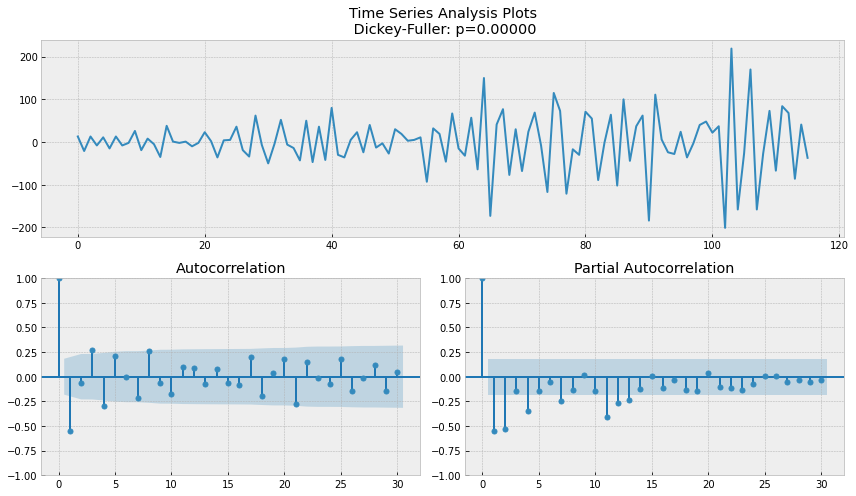

In [31]:
tsplot(robberies_in_boston, lags=30)

airlines_passengers

Results of Dickey-Fuller Test:
Test Statistic                   0.815369
p-value                          0.991880
#Lags Used                      13.000000
Number of Observations Used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
Critical Value (10%)            -2.578770
dtype: float64


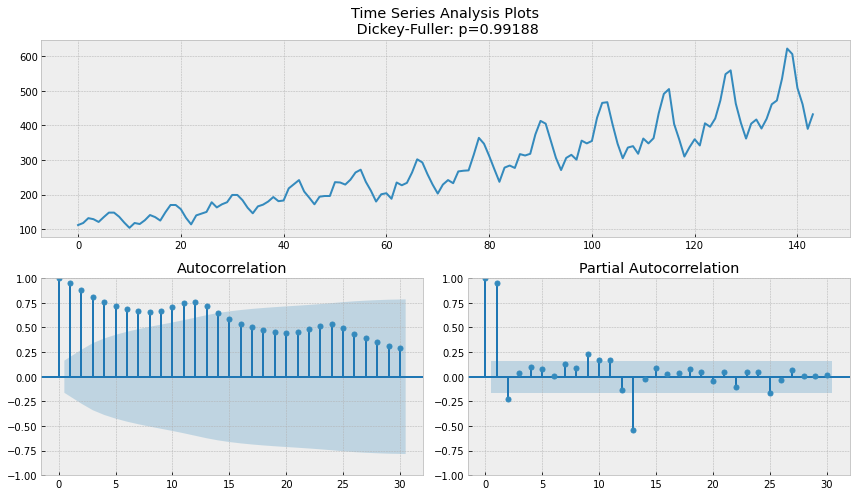

In [32]:
tsplot(airlines_passengers, lags=30)

Results of Dickey-Fuller Test:
Test Statistic                  -1.717017
p-value                          0.422367
#Lags Used                      13.000000
Number of Observations Used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
Critical Value (10%)            -2.578770
dtype: float64


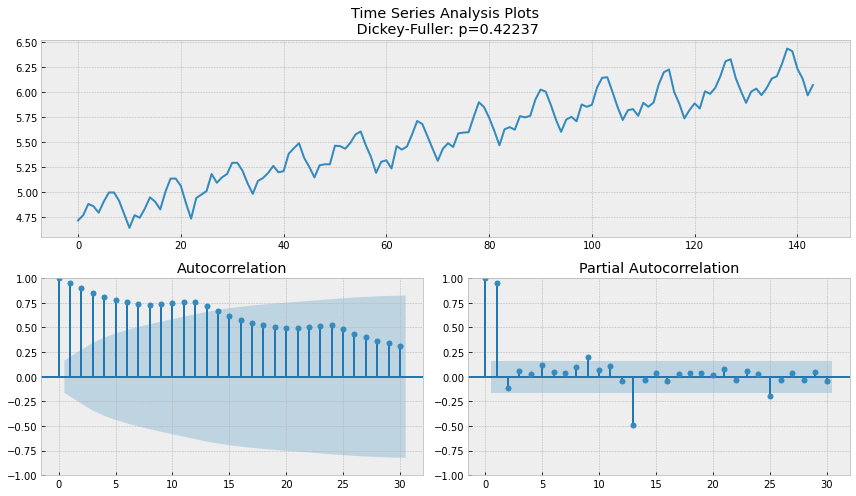

In [33]:
airlines_passengers_bc = boxcox(airlines_passengers, 0)
tsplot(airlines_passengers_bc, lags=30)

Results of Dickey-Fuller Test:
Test Statistic                  -1.717017
p-value                          0.422367
#Lags Used                      13.000000
Number of Observations Used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
Critical Value (10%)            -2.578770
dtype: float64


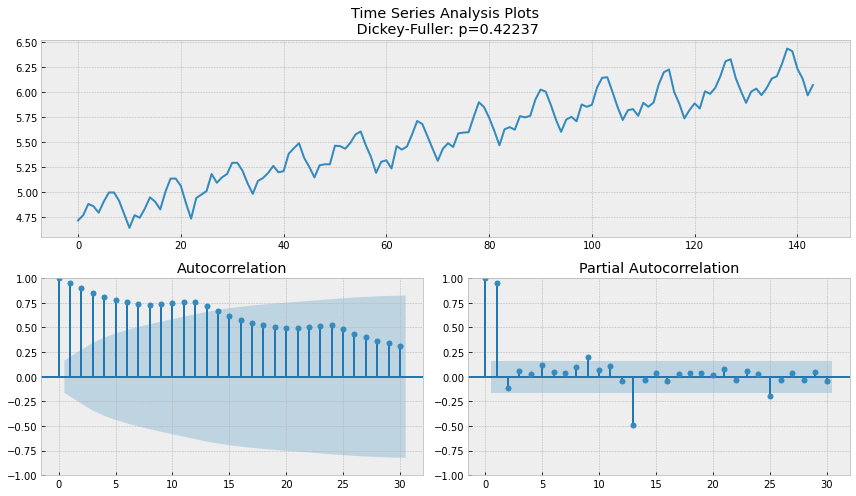

In [38]:
airlines_passengers = np.diff(airlines_passengers, 1)
tsplot(airlines_passengers_bc, lags=30)

Results of Dickey-Fuller Test:
Test Statistic                -1.638423e+01
p-value                        2.732892e-29
#Lags Used                     1.100000e+01
Number of Observations Used    1.300000e+02
Critical Value (1%)           -3.481682e+00
Critical Value (5%)           -2.884042e+00
Critical Value (10%)          -2.578770e+00
dtype: float64


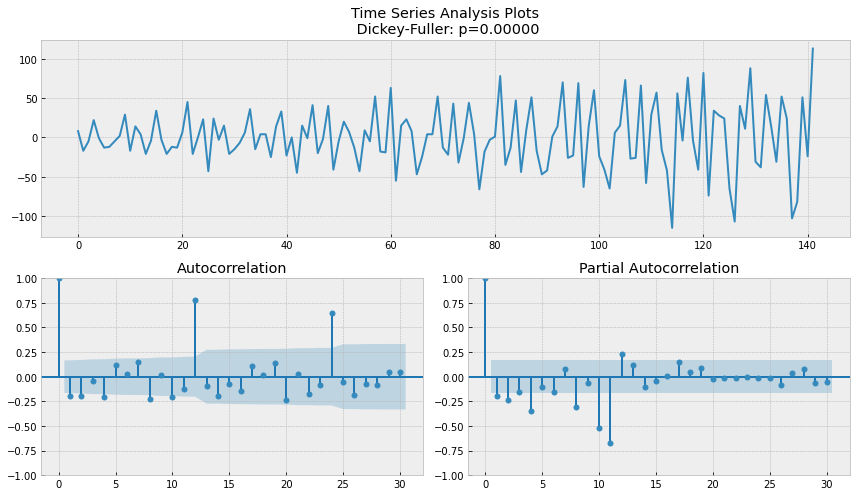

In [39]:
airlines_passengers = np.diff(airlines_passengers, 1)
tsplot(airlines_passengers, lags=30)

mean_monthly_temp

Results of Dickey-Fuller Test:
Test Statistic                  -3.255492
p-value                          0.016989
#Lags Used                      14.000000
Number of Observations Used    225.000000
Critical Value (1%)             -3.459752
Critical Value (5%)             -2.874473
Critical Value (10%)            -2.573663
dtype: float64


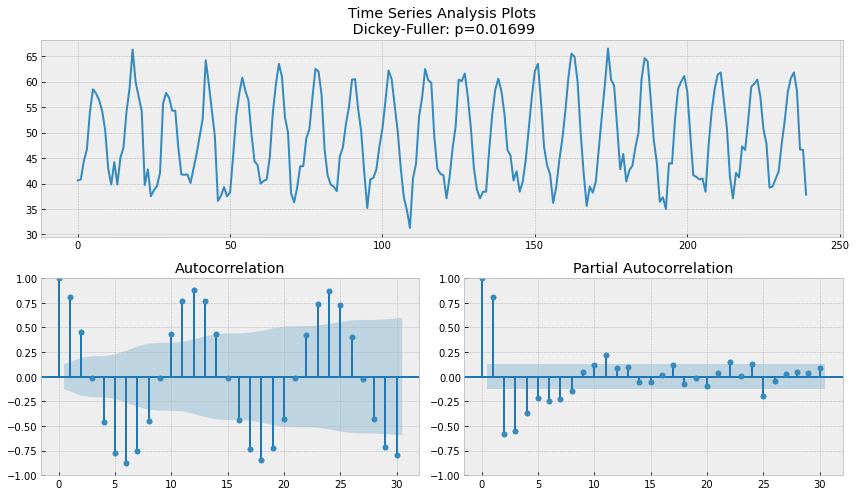

In [40]:
tsplot(mean_monthly_temp, lags=30)

Results of Dickey-Fuller Test:
Test Statistic                  -3.760996
p-value                          0.003333
#Lags Used                      15.000000
Number of Observations Used    224.000000
Critical Value (1%)             -3.459885
Critical Value (5%)             -2.874531
Critical Value (10%)            -2.573694
dtype: float64


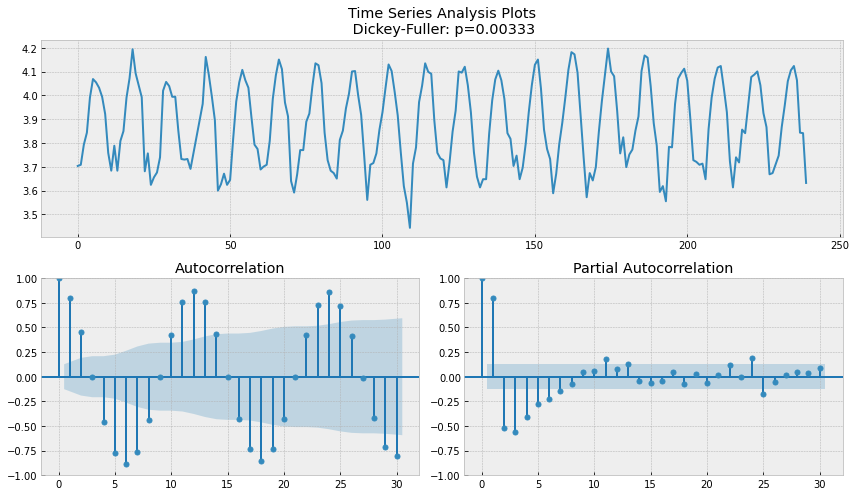

In [41]:
mean_monthly_temp_bc = boxcox(mean_monthly_temp, 0)
tsplot(mean_monthly_temp_bc, lags=30)

Results of Dickey-Fuller Test:
Test Statistic                -1.225927e+01
p-value                        9.157883e-23
#Lags Used                     1.100000e+01
Number of Observations Used    2.270000e+02
Critical Value (1%)           -3.459490e+00
Critical Value (5%)           -2.874358e+00
Critical Value (10%)          -2.573602e+00
dtype: float64


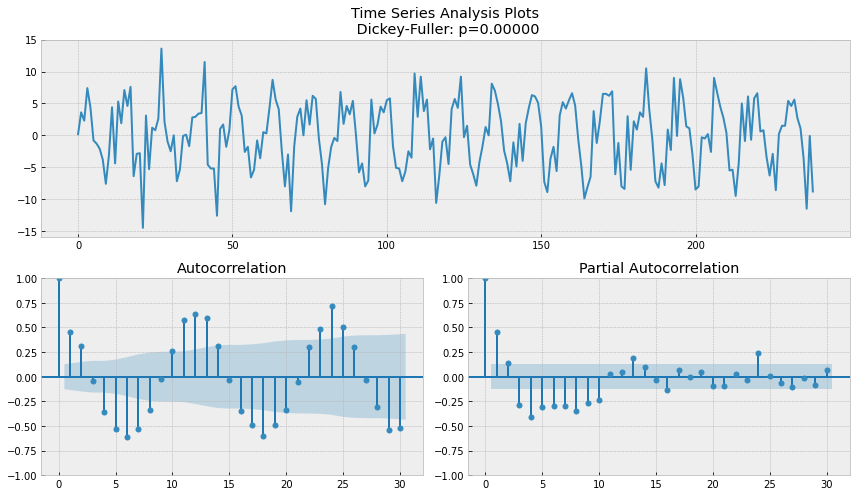

In [42]:
mean_monthly_temp = np.diff(mean_monthly_temp, 1)
tsplot(mean_monthly_temp, lags=30)

dowjones_closing

Results of Dickey-Fuller Test:
Test Statistic                  -1.314625
p-value                          0.622455
#Lags Used                       0.000000
Number of Observations Used    161.000000
Critical Value (1%)             -3.471633
Critical Value (5%)             -2.879665
Critical Value (10%)            -2.576434
dtype: float64


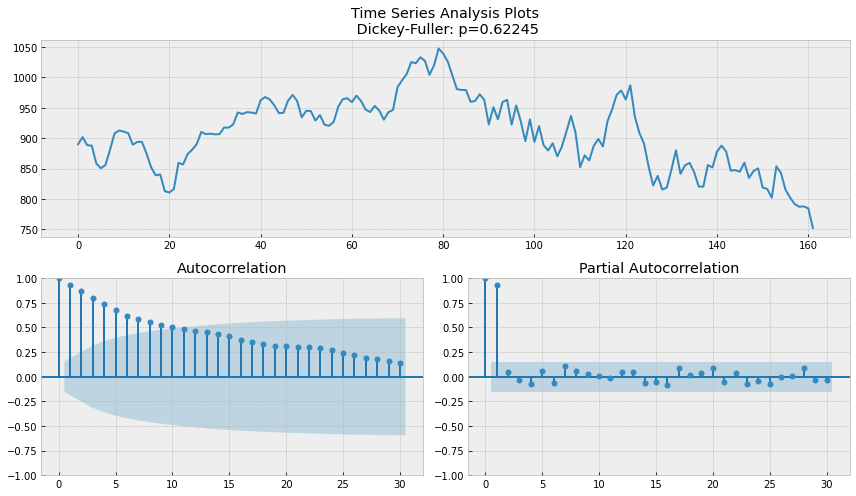

In [44]:
tsplot(dowjones_closing, lags=30)

Results of Dickey-Fuller Test:
Test Statistic                  -1.210369
p-value                          0.669119
#Lags Used                       0.000000
Number of Observations Used    161.000000
Critical Value (1%)             -3.471633
Critical Value (5%)             -2.879665
Critical Value (10%)            -2.576434
dtype: float64


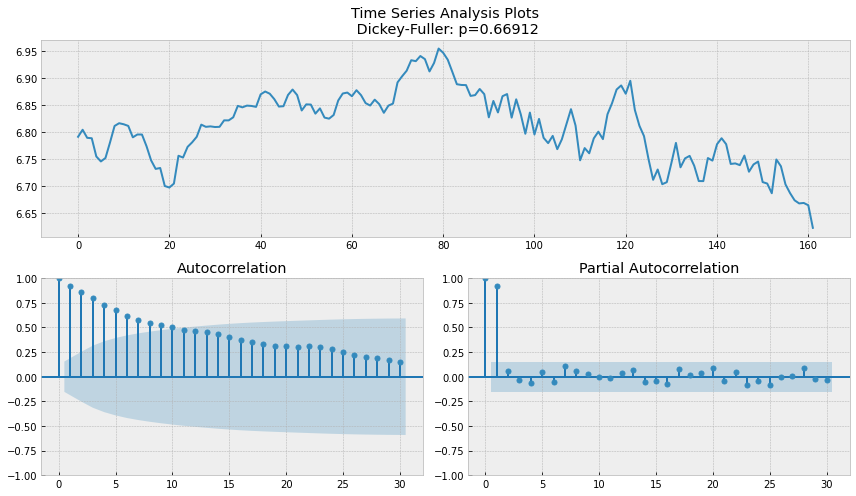

In [45]:
dowjones_closing_bc = boxcox(dowjones_closing, 0)
tsplot(dowjones_closing_bc, lags=30)

Results of Dickey-Fuller Test:
Test Statistic                  -5.043437
p-value                          0.000018
#Lags Used                      14.000000
Number of Observations Used    145.000000
Critical Value (1%)             -3.476273
Critical Value (5%)             -2.881688
Critical Value (10%)            -2.577513
dtype: float64


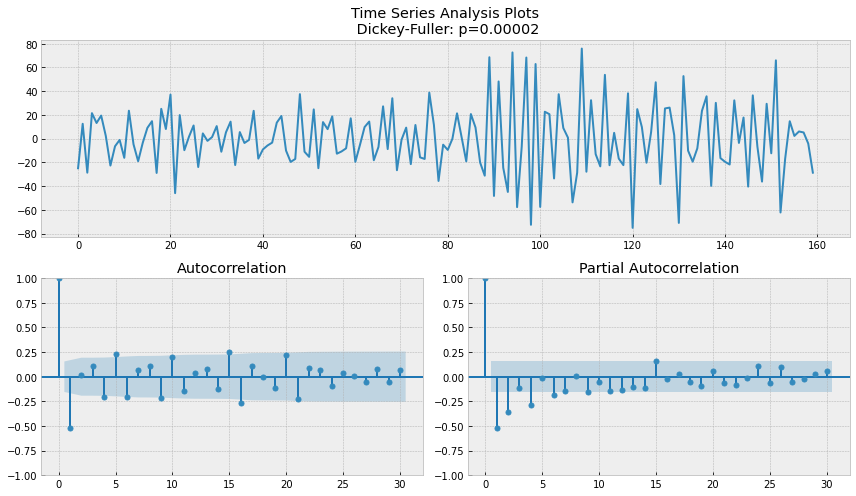

In [47]:
dowjones_closing = np.diff(dowjones_closing, 1)
tsplot(dowjones_closing, lags=30)

Results of Dickey-Fuller Test:
Test Statistic                -8.413289e+00
p-value                        2.075862e-13
#Lags Used                     1.300000e+01
Number of Observations Used    1.450000e+02
Critical Value (1%)           -3.476273e+00
Critical Value (5%)           -2.881688e+00
Critical Value (10%)          -2.577513e+00
dtype: float64


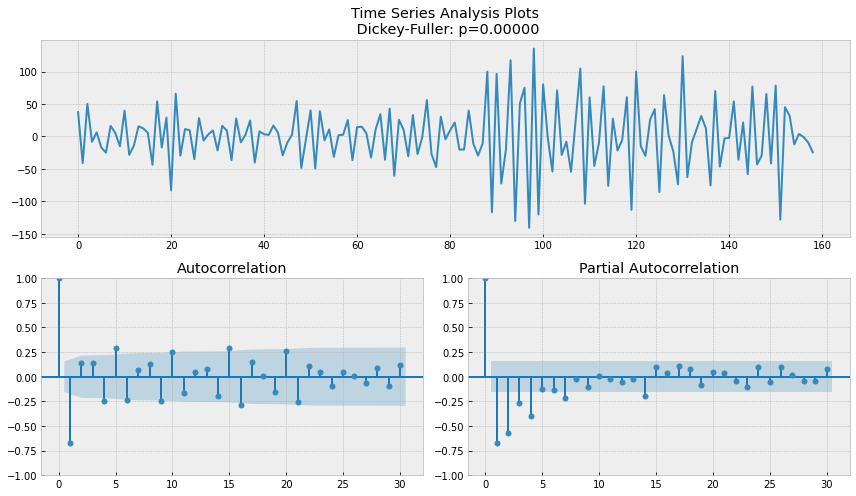

In [48]:
dowjones_closing = np.diff(dowjones_closing, 1)
tsplot(dowjones_closing, lags=30)

female_births

Results of Dickey-Fuller Test:
Test Statistic                  -4.808291
p-value                          0.000052
#Lags Used                       6.000000
Number of Observations Used    358.000000
Critical Value (1%)             -3.448749
Critical Value (5%)             -2.869647
Critical Value (10%)            -2.571089
dtype: float64


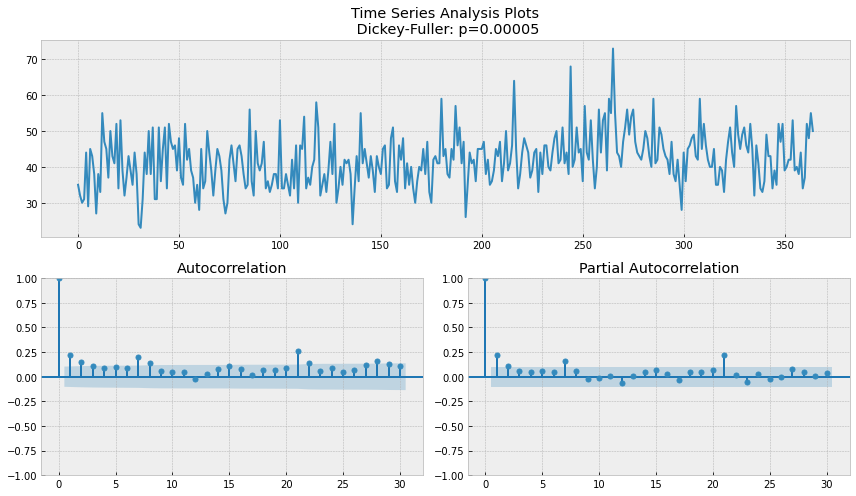

In [49]:
tsplot(female_births, lags=30)

Results of Dickey-Fuller Test:
Test Statistic                  -4.353173
p-value                          0.000359
#Lags Used                       7.000000
Number of Observations Used    357.000000
Critical Value (1%)             -3.448801
Critical Value (5%)             -2.869670
Critical Value (10%)            -2.571101
dtype: float64


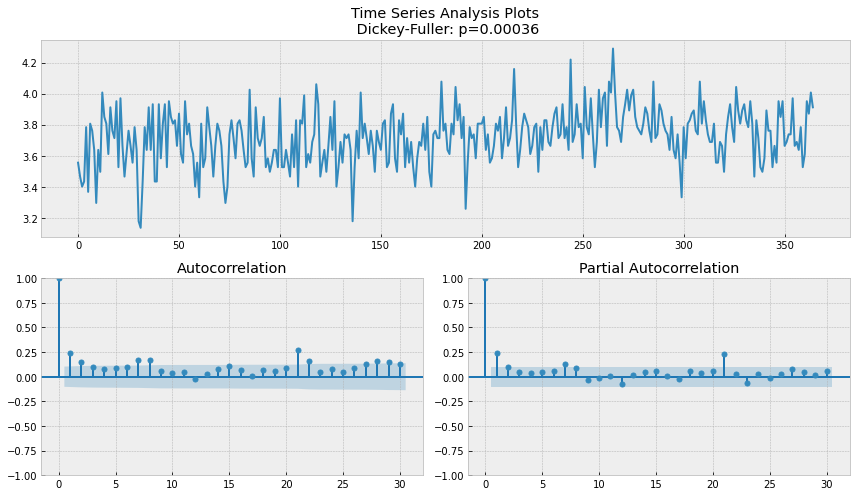

In [50]:
female_births_bc = boxcox(female_births, 0)
tsplot(female_births_bc, lags=30)

Results of Dickey-Fuller Test:
Test Statistic                -1.262518e+01
p-value                        1.547240e-23
#Lags Used                     6.000000e+00
Number of Observations Used    3.570000e+02
Critical Value (1%)           -3.448801e+00
Critical Value (5%)           -2.869670e+00
Critical Value (10%)          -2.571101e+00
dtype: float64


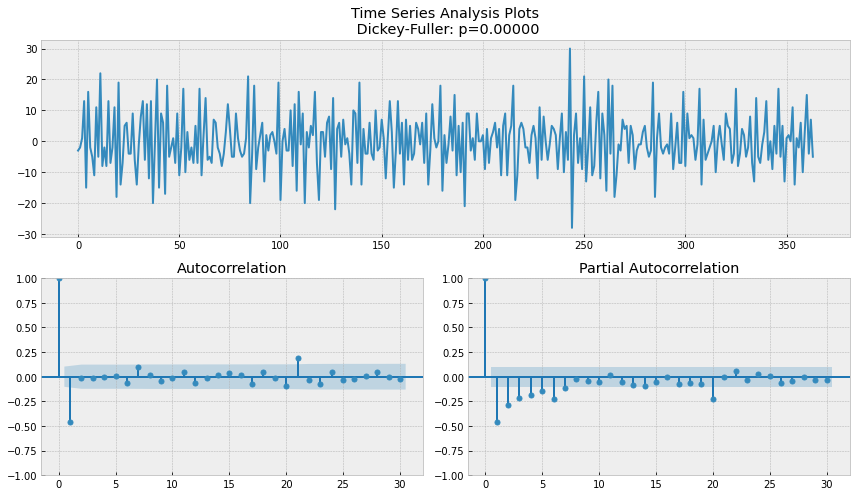

In [51]:
female_births = np.diff(female_births, 1)
tsplot(female_births, lags=30)